In [49]:
library(tidyverse)
library(tidymodels)

In [50]:
players <- read_csv("players.csv")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


In [51]:
sessions <- read_csv("sessions.csv") 
head(sessions)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


The two datasets include information about players of Minecraft and their play sessions. The players.csv file has data of 196 observations from the players of Minecraft, including 7 variables: player's experience, subscription status, hashedEmail, played hours, and personal information (name, gender and age).
The sessions.csv file has data of 1535 observations from individual play sessions of players, including 5 variables: hashedEmail, start time, end time, original start time, and original end time.

I am interested in question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types? To find the player characteristics/behaviours that best predicts subscription of a player, I will be using the dataset "players", as it contains the variables of player characterstics/behaviours and results of subscription that can be used to train a KNN classification model. 

In [52]:
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


From this dataset (players), we can see that only the columns "experience", "subscribe", "played_hours", "gender" and "Age" are useful description of players' characteristics and behaviours, therefore, we can omit the others. 

In [53]:
players <- select(players, experience, subscribe, played_hours, gender, Age)
players

experience,subscribe,played_hours,gender,Age
<chr>,<lgl>,<dbl>,<chr>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
Amateur,TRUE,0.7,Female,21
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.0,Female,17
Regular,TRUE,0.0,Female,19
Amateur,FALSE,0.0,Male,21
Amateur,TRUE,0.1,Male,17


In [54]:
# The columns "experience", "subscribe" and "gender" are categorical variables, 
# therefore we would like to change the type of observations in those columns into factors, 
# to make it more convenient for creating a classification model later. 
# Note: "subscribe" is the outcome/label variable, since we are trying to predict the subscribing of players.
players <- mutate(players, 
                  experience = as.factor(experience), 
                  subscribe = as.factor(subscribe), 
                  gender = as.factor(gender))
players

experience,subscribe,played_hours,gender,Age
<fct>,<fct>,<dbl>,<fct>,<dbl>
Pro,TRUE,30.3,Male,9
Veteran,TRUE,3.8,Male,17
Veteran,FALSE,0.0,Male,17
Amateur,TRUE,0.7,Female,21
Regular,TRUE,0.1,Male,21
Amateur,TRUE,0.0,Female,17
Regular,TRUE,0.0,Female,19
Amateur,FALSE,0.0,Male,21
Amateur,TRUE,0.1,Male,17


In [55]:
# Let's look at the number of groups in a variable and how many observations are there in each group.
experience_stat <- players |>
    group_by(experience) |>
    summarize(num_players = n())
experience_lvls

subscribe_stat <- players |>
    group_by(subscribe) |>
    summarize(num_players = n())
subscribe_stat

gender_stat <- players |>
    group_by(gender) |>
    summarize(num_players = n())
gender_stat

experience,num_players
<fct>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


subscribe,num_players
<fct>,<int>
FALSE,52
TRUE,144


gender,num_players
<fct>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


In [56]:
# Let's also look at the range of values in the played_hours and Age variables. 
played_hours_stat <- players |>
    pull(played_hours) |>
    range()
played_hours_stat

age_stat <- players |>
    pull(Age) |>
    range(na.rm = TRUE)
age_stat

[1]   0.0 223.1

[1]  8 50

For the experience variable, there are 5 groups of observations: 63 amateurs, 35 beginners, 14 pros, 36 regulars, and 48 veterans. For the gender variable, there are 7 groups of observations: 2 agenders, 37 females, 124 males, 15 non-binary, 1 other, 11 prefer not to say, and 6 two-spirited. For the played_hours variable, the range of the values is between 0 hours to 223.1 hours. For the age variable, the range of values is between 8 years old to 50 years old. There are 52 players that did not subscribe and 144 players that subscribed to a game-related newsletter. 

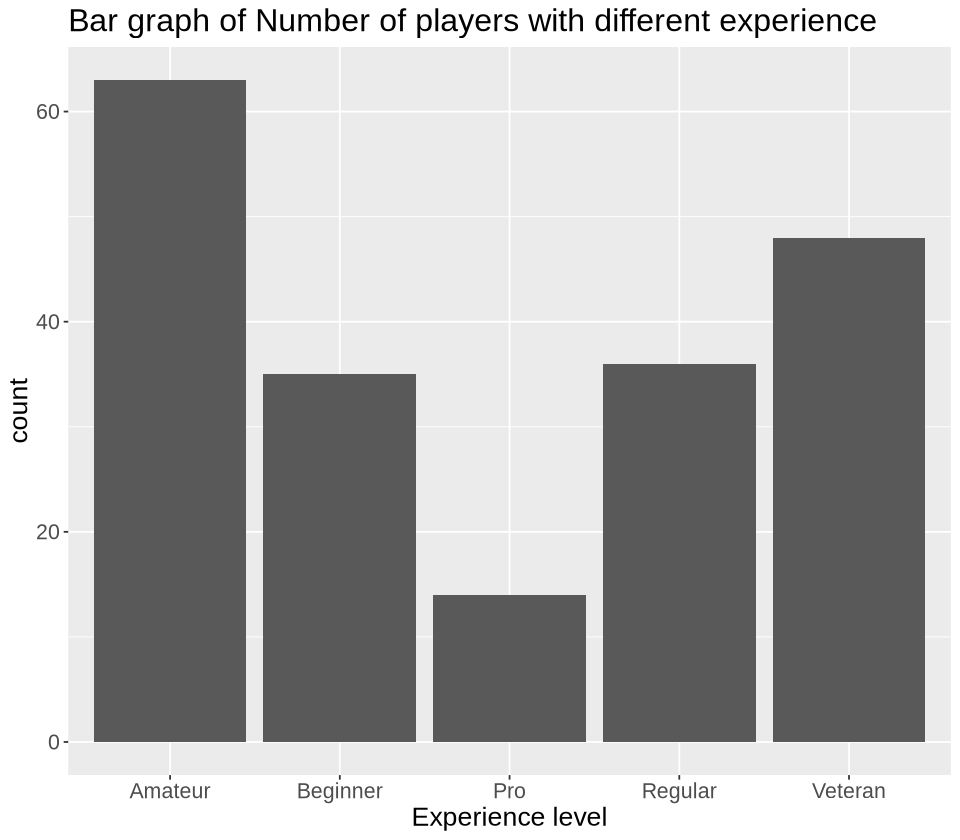

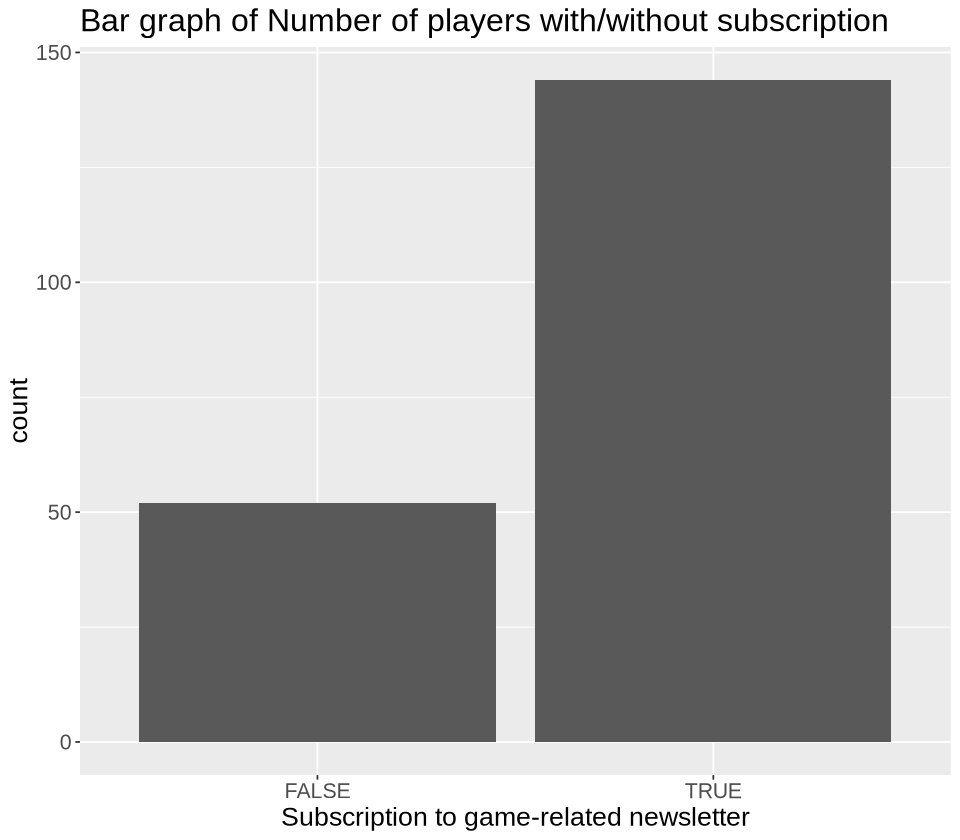

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


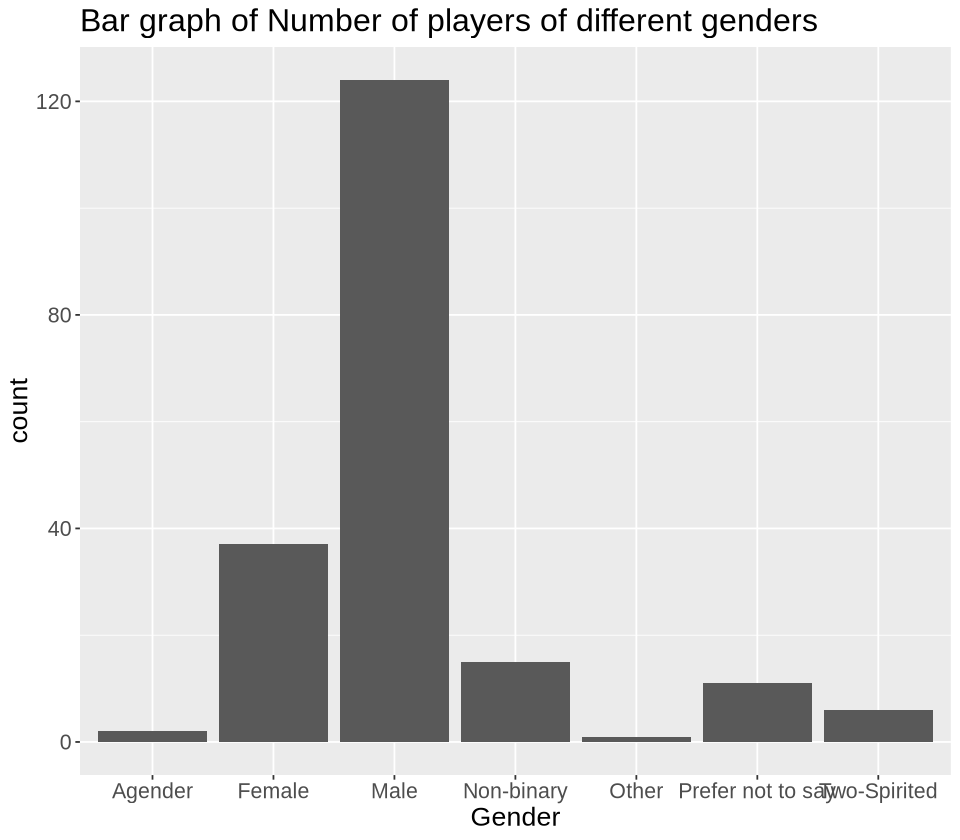

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


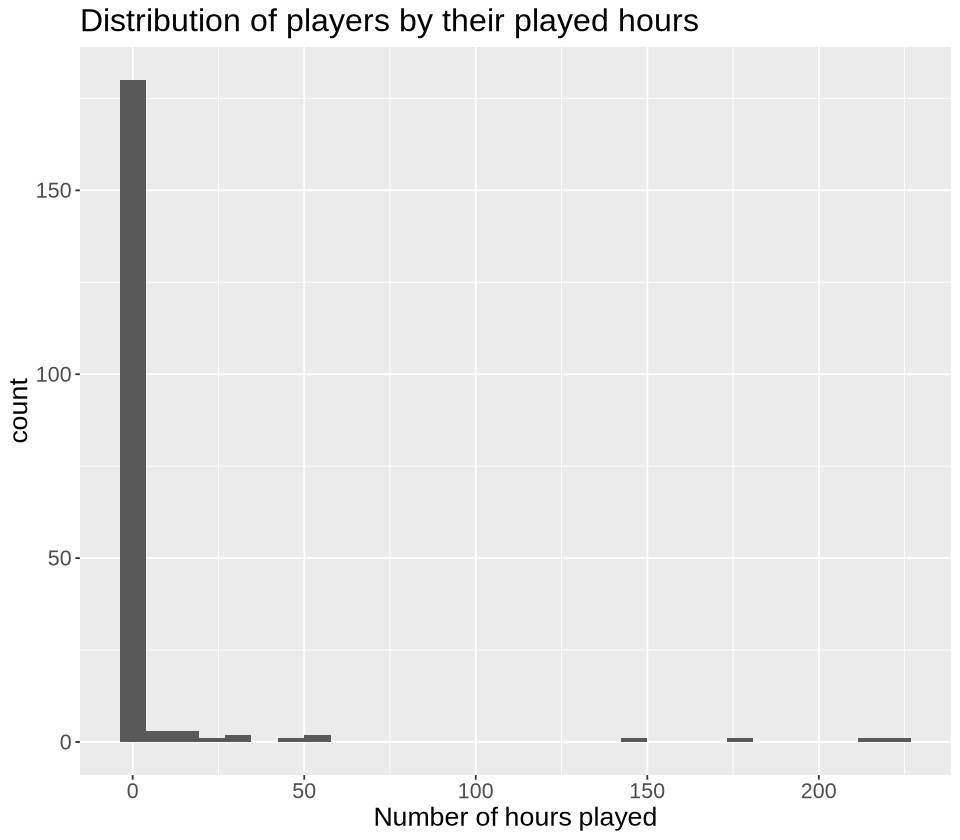

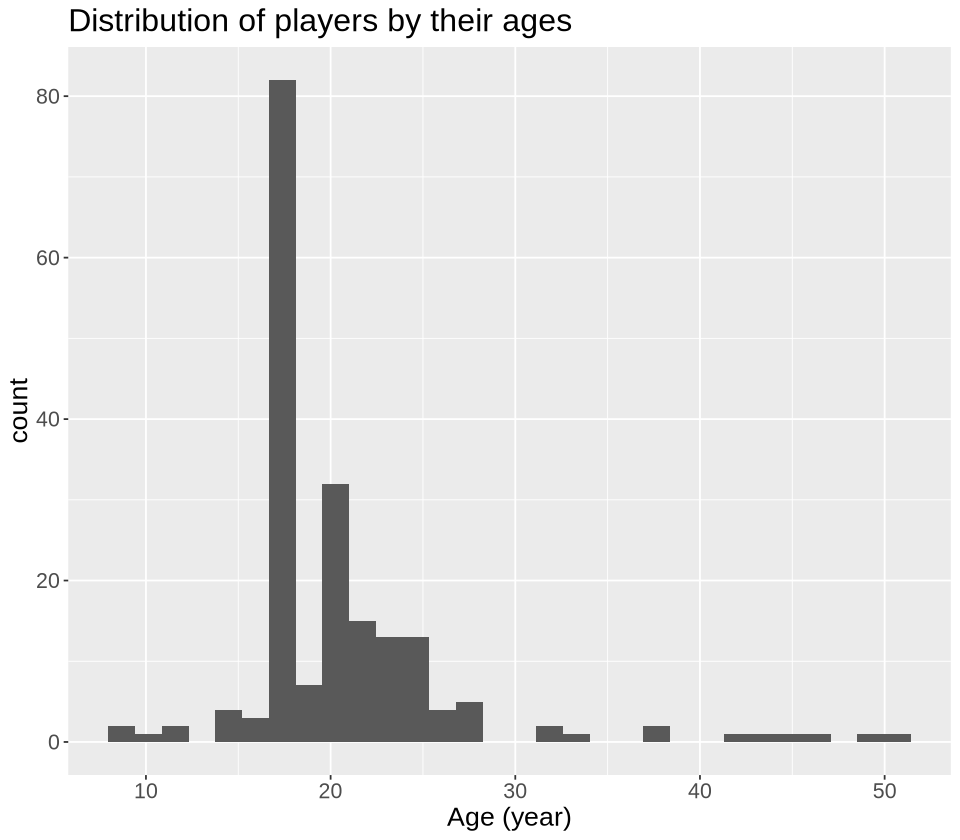

In [57]:
# Lets make some visualizations of each variable
options(repr.plot.width = 8, repr.plot.height = 7)
# a bar graph of number of players compared between their experience levels
experience_bar <- players |>
    ggplot(aes(x = experience)) +
    geom_bar() +
    labs(x = "Experience level", title = "Bar graph of Number of players with different experience") +
    theme(text = element_text(size = 16))
experience_bar 

# a bar graph of number of players compared between their subscription
subscribe_bar <- players |>
    ggplot(aes(x = subscribe)) +
    geom_bar() +
    labs(x = "Subscription to game-related newsletter", title = "Bar graph of Number of players with/without subscription") +
    theme(text = element_text(size = 16))
subscribe_bar 

# a bar graph of number of players compared between their genders
gender_bar <- players |>
    ggplot(aes(x = gender)) +
    geom_bar() +
    labs(x = "Gender", title = "Bar graph of Number of players of different genders") +
    theme(text = element_text(size = 16))
gender_bar

# a histogram of distribution of players based on their played hours
played_hours_histogram <- players |>
    ggplot(aes(x = played_hours)) +
    geom_histogram() +
    labs(x = "Number of hours played", title = "Distribution of players by their played hours") +
    theme(text = element_text(size = 16))
played_hours_histogram 

# a histogram of distribution of players based on their played hours
age_histogram <- players |>
    ggplot(aes(x = Age)) +
    geom_histogram() +
    labs(x = "Age (year)", title = "Distribution of players by their ages") +
    theme(text = element_text(size = 16))
age_histogram 

In [62]:
#create a KNN classification model
library(themis)

players_split <- initial_split(players, prop = 0.75, strata = subscribe)
players_train <- training(players_split)
players_test <- testing(players_split)

players_recipe <- recipe(subscribe ~ .,
                        data = players_train)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 5) |>
  set_engine("kknn") |>
  set_mode("classification")
knn_spec

knn_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(knn_spec) |>
  fit(data = players_train)

knn_results <- predict(knn_fit, players_test) |>
  bind_cols(players_test) |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()

knn_results


K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = 5
  weight_func = rectangular

Computational engine: kknn 


[1] 0.7142857